In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# One Class SVM
# Auto Encoders
# Isolation Forest
# Hyper Parameter Tunning
# train and Test 80:20
# accuracy, recall, F1 score, and AUC-ROC

In [ ]:
# Specify the path to the CSV file
data = pd.read_csv(r"C:\\Users\\Paschallline\\first_100000_rows.csv")
data

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,1540469303,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687,216.239.35.4,123,udp,-,0.114184,48,...,-,-,0,Dd,1,76,1,76,- benign -,NaN
1,1540469197,CnaDAG3n5r8eiG4su2,192.168.1.132,1900,239.255.255.250,1900,udp,-,160.367579,7536,...,-,-,0,D,24,8208,0,0,- benign -,NaN
2,1540469386,CUrxU238nt0m6yTgKf,192.168.1.132,32893,216.239.35.8,123,udp,-,0.016986,48,...,-,-,0,Dd,1,76,1,76,- benign -,NaN
3,1540469831,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395,2.16.60.82,443,tcp,-,0.003497,0,...,-,-,0,ShAFf,5,212,3,144,- benign -,NaN
4,1540469831,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34,...,-,-,0,Dd,1,62,1,339,- benign -,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101831,1525917215,CglgXT3rpK8MYqYDJc,192.168.100.103,52042,175.169.113.76,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
101832,1525917161,CP7HNi3xEv130RvXb3,192.168.100.103,43763,144.75.169.179,22626,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
101833,1525917216,CaKtMW2mwrLlAqCcli,192.168.100.103,51626,35.103.30.78,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
101834,1525917161,C6InRV3ZxFdLKZYsOh,144.75.175.50,11,192.168.100.103,0,icmp,-,-,-,...,-,-,0,-,1,56,0,0,(empty) Benign -,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101836 entries, 0 to 101835
Data columns (total 22 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   #fields                                  101836 non-null  object
 1   ts                                       101834 non-null  object
 2   uid                                      101822 non-null  object
 3   id.orig_h                                101822 non-null  object
 4   id.orig_p                                101822 non-null  object
 5   id.resp_h                                101822 non-null  object
 6   id.resp_p                                101822 non-null  object
 7   proto                                    101822 non-null  object
 8   service                                  101822 non-null  object
 9   duration                                 101822 non-null  object
 10  orig_bytes                               101

In [5]:
# Randomly select 10,000 rows from the DataFrame
data = data.sample(n=10000, random_state=42)  # Setting random_state for reproducibility

# If you want to reset the index of the selected sample
data.reset_index(drop=True, inplace=True)

# Display the selected random sample
data

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,1525886327,CCgnLJ10KSUXo4361j,192.168.100.103,43763,230.170.105.210,30508,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
1,1525901265,C5aCpn1Zs4lRfZzM16,192.168.100.103,60006,82.243.151.23,15409,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Benign -,NaN
2,1525891104,CcKFMi3BNQ0UivKZN,192.168.100.103,52872,192.201.250.82,8080,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
3,1525913652,CDUgON2oPPIGZzS0T1,192.168.100.103,43763,223.90.6.224,13944,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
4,1525891138,CQeHEE2YU7WwsvxcO9,192.168.100.103,60776,161.222.111.104,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1525887707,CYWLQz10sljBZIScG1,192.168.100.103,43763,182.103.44.72,65280,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
9996,1537535308,Cwg5LBwQ3BTh6J6Gc,192.168.2.3,59312,52.216.105.243,80,tcp,http,300.094909,292,...,-,-,0,ShADadfFr,8,632,6,1027,- benign -,NaN
9997,1525885300,Ct5WhurLggI85tIKl,192.168.100.103,56375,178.76.152.203,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
9998,1525901002,CumH1g3hCREkurOSr2,192.168.100.103,43763,110.190.185.29,52613,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN


In [6]:
# Replace NaN values with empty strings in all columns
df = data.fillna('')

# If you want to replace NaN values with specific values in each column, you can specify a dictionary
# For example, if you want to replace NaN in 'ts' column with 'N/A' and in other columns with 0
data_filled_specific = data.fillna({'ts': 'N/A', 'uid': 0, 'id.orig_h': 0, 'id.orig_p': 0, 'id.resp_h': 0,
                                    'id.resp_p': 0, 'proto': 0, 'service': 0, 'duration': 0, 'orig_bytes': 0,
                                    'resp_bytes': 0, 'conn_state': 0, 'local_orig': 0, 'local_resp': 0,
                                    'missed_bytes': 0, 'history': 0, 'orig_pkts': 0, 'orig_ip_bytes': 0,
                                    'resp_pkts': 0, 'resp_ip_bytes': 0, 'tunnel_parents': '', 'label': '',
                                    'detailed-label': ''})

# Print the DataFrame to verify changes
df

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,1525886327,CCgnLJ10KSUXo4361j,192.168.100.103,43763,230.170.105.210,30508,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,
1,1525901265,C5aCpn1Zs4lRfZzM16,192.168.100.103,60006,82.243.151.23,15409,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Benign -,
2,1525891104,CcKFMi3BNQ0UivKZN,192.168.100.103,52872,192.201.250.82,8080,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,
3,1525913652,CDUgON2oPPIGZzS0T1,192.168.100.103,43763,223.90.6.224,13944,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,
4,1525891138,CQeHEE2YU7WwsvxcO9,192.168.100.103,60776,161.222.111.104,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1525887707,CYWLQz10sljBZIScG1,192.168.100.103,43763,182.103.44.72,65280,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,
9996,1537535308,Cwg5LBwQ3BTh6J6Gc,192.168.2.3,59312,52.216.105.243,80,tcp,http,300.094909,292,...,-,-,0,ShADadfFr,8,632,6,1027,- benign -,
9997,1525885300,Ct5WhurLggI85tIKl,192.168.100.103,56375,178.76.152.203,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,
9998,1525901002,CumH1g3hCREkurOSr2,192.168.100.103,43763,110.190.185.29,52613,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   #fields                                  10000 non-null  object
 1   ts                                       10000 non-null  object
 2   uid                                      10000 non-null  object
 3   id.orig_h                                10000 non-null  object
 4   id.orig_p                                10000 non-null  object
 5   id.resp_h                                10000 non-null  object
 6   id.resp_p                                10000 non-null  object
 7   proto                                    10000 non-null  object
 8   service                                  10000 non-null  object
 9   duration                                 10000 non-null  object
 10  orig_bytes                               10000 non-null  ob

In [8]:
# Specify the columns you want to drop
columns_to_drop = ['proto', 'conn_state', 'local_orig','tunnel_parents   label   detailed-label']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after dropping columns
df

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,service,duration,orig_bytes,resp_bytes,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1525886327,CCgnLJ10KSUXo4361j,192.168.100.103,43763,230.170.105.210,30508,udp,-,-,-,S0,0,D,1,40,0,0,(empty) Benign -
1,1525901265,C5aCpn1Zs4lRfZzM16,192.168.100.103,60006,82.243.151.23,15409,tcp,-,-,-,S0,0,S,1,60,0,0,(empty) Benign -
2,1525891104,CcKFMi3BNQ0UivKZN,192.168.100.103,52872,192.201.250.82,8080,tcp,-,-,-,S0,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan
3,1525913652,CDUgON2oPPIGZzS0T1,192.168.100.103,43763,223.90.6.224,13944,udp,-,-,-,S0,0,D,1,40,0,0,(empty) Benign -
4,1525891138,CQeHEE2YU7WwsvxcO9,192.168.100.103,60776,161.222.111.104,23,tcp,-,-,-,S0,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1525887707,CYWLQz10sljBZIScG1,192.168.100.103,43763,182.103.44.72,65280,udp,-,-,-,S0,0,D,1,40,0,0,(empty) Benign -
9996,1537535308,Cwg5LBwQ3BTh6J6Gc,192.168.2.3,59312,52.216.105.243,80,tcp,300.094909,292,775,SF,0,ShADadfFr,8,632,6,1027,- benign -
9997,1525885300,Ct5WhurLggI85tIKl,192.168.100.103,56375,178.76.152.203,23,tcp,-,-,-,S0,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan
9998,1525901002,CumH1g3hCREkurOSr2,192.168.100.103,43763,110.190.185.29,52613,udp,-,-,-,S0,0,D,1,40,0,0,(empty) Benign -


In [9]:
# Replace NaN values with a specific value (e.g., 0)
df = df.fillna(0)

In [10]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Print the number of null values in each column
print("Null values in each column:")
print(null_values)

# Alternatively, you can print only the columns with null values
print("\nColumns with null values:")
print(null_values[null_values > 0])

Null values in each column:
#fields          0
ts               0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
service          0
duration         0
orig_bytes       0
resp_bytes       0
local_resp       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
dtype: int64

Columns with null values:
Series([], dtype: int64)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   #fields        10000 non-null  object
 1   ts             10000 non-null  object
 2   uid            10000 non-null  object
 3   id.orig_h      10000 non-null  object
 4   id.orig_p      10000 non-null  object
 5   id.resp_h      10000 non-null  object
 6   id.resp_p      10000 non-null  object
 7   service        10000 non-null  object
 8   duration       10000 non-null  object
 9   orig_bytes     10000 non-null  object
 10  resp_bytes     10000 non-null  object
 11  local_resp     10000 non-null  object
 12  missed_bytes   10000 non-null  object
 13  history        10000 non-null  object
 14  orig_pkts      10000 non-null  object
 15  orig_ip_bytes  10000 non-null  object
 16  resp_pkts      10000 non-null  object
 17  resp_ip_bytes  10000 non-null  object
dtypes: object(18)
memory usage:

In [12]:
# Find unique labels in the "resp_ip_bytes" column
unique_labels = df['resp_ip_bytes'].unique()

# Display the unique labels
print("Unique labels in 'resp_ip_bytes' column:")
print(unique_labels)

Unique labels in 'resp_ip_bytes' column:
['(empty)   Benign   -' '(empty)   Malicious   PartOfAHorizontalPortScan'
 '-   benign   -' '']


In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column] = label_encoder.fit_transform(df[column].astype(str))

In [14]:
# Define the features (X) and the target variable (y)
X = df.drop(columns=['resp_ip_bytes'])  # Features
y = df['resp_ip_bytes']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define and train the Isolation Forest model
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X_train)

# Predictions on training data
y_train_pred_if = isolation_forest.predict(X_train)

# Predictions on testing data
y_test_pred_if = isolation_forest.predict(X_test)

# Classification report
cr_n_if = classification_report(y_test, y_test_pred_if)
print("Classification Report for Isolation Forest:\n", cr_n_if)

# Calculate training accuracy (accuracy is not a typical metric for Isolation Forest, but we can calculate it as follows)
tr_ac_n_if = accuracy_score(y_train, y_train_pred_if)
print("Training Accuracy for Isolation Forest:", tr_ac_n_if)

# Calculate testing accuracy (accuracy is not a typical metric for Isolation Forest, but we can calculate it as follows)
tst_ac_n_if = accuracy_score(y_test, y_test_pred_if)
print("Testing Accuracy for Isolation Forest:", tst_ac_n_if)


Classification Report for Isolation Forest:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.46      0.90      0.61       905
           2       0.00      0.00      0.00      1063
           3       0.00      0.00      0.00        32

    accuracy                           0.41      2000
   macro avg       0.11      0.23      0.15      2000
weighted avg       0.21      0.41      0.28      2000

Training Accuracy for Isolation Forest: 0.402875
Testing Accuracy for Isolation Forest: 0.4095


In [16]:
# Create an instance of OneClassSVM
one_class_svm = OneClassSVM()

# Train the OneClassSVM model
one_class_svm.fit(X_train)

# Predictions on the training set
y_train_pred_osvm = one_class_svm.predict(X_train)

# Predictions on the testing set
y_test_pred_osvm = one_class_svm.predict(X_test)

# Classification report
cr_n_osvm = classification_report(y_test, y_test_pred_osvm)
print("Classification Report:")
print(cr_n_osvm)

# Training accuracy
tr_ac_n_osvm = accuracy_score(y_train, y_train_pred_osvm)
print("Training Accuracy:", tr_ac_n_osvm)

# Testing accuracy
tst_ac_n_osvm = accuracy_score(y_test, y_test_pred_osvm)
print("Testing Accuracy:", tst_ac_n_osvm)


Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.53      0.58      0.55       905
           2       0.00      0.00      0.00      1063
           3       0.00      0.00      0.00        32

    accuracy                           0.26      2000
   macro avg       0.13      0.15      0.14      2000
weighted avg       0.24      0.26      0.25      2000

Training Accuracy: 0.25775
Testing Accuracy: 0.263


In [17]:
# Instantiate the Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred_lr = log_reg_model.predict(X_train)

# Predictions on testing data
y_test_pred_lr = log_reg_model.predict(X_test)

# Classification report
cr_n_lr = classification_report(y_test, y_test_pred_lr)
print("Classification Report for Logistic Regression:")
print(cr_n_lr)

# Calculate training accuracy
tr_ac_n_lr = accuracy_score(y_train, y_train_pred_lr)
print("Training Accuracy for Logistic Regression:", tr_ac_n_lr)

# Calculate testing accuracy
tst_ac_n_lr = accuracy_score(y_test, y_test_pred_lr)
print("Testing Accuracy for Logistic Regression:", tst_ac_n_lr)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.70      0.92      0.79       905
           2       0.88      0.67      0.76      1063
           3       0.50      0.06      0.11        32

    accuracy                           0.77      2000
   macro avg       0.69      0.55      0.56      2000
weighted avg       0.79      0.77      0.77      2000

Training Accuracy for Logistic Regression: 0.775125
Testing Accuracy for Logistic Regression: 0.7725


In [18]:
# Instantiate the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred_dt = decision_tree.predict(X_train)
y_test_pred_dt = decision_tree.predict(X_test)

# Classification report
cr_n_dt = classification_report(y_test, y_test_pred_dt)
print("Classification Report for Decision Tree Classifier:\n", cr_n_dt)

# Training accuracy
tr_ac_n_dt = accuracy_score(y_train, y_train_pred_dt)
print("Training Accuracy for Decision Tree Classifier:", tr_ac_n_dt)

# Testing accuracy
tst_ac_n_dt = accuracy_score(y_test, y_test_pred_dt)
print("Testing Accuracy for Decision Tree Classifier:", tst_ac_n_dt)


Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       905
           2       1.00      1.00      1.00      1063
           3       1.00      1.00      1.00        32

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Training Accuracy for Decision Tree Classifier: 1.0
Testing Accuracy for Decision Tree Classifier: 0.9985


In [19]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on training data
y_train_pred_rf = rf_classifier.predict(X_train)

# Predictions on testing data
y_test_pred_rf = rf_classifier.predict(X_test)

# Classification Report
cr_n_rf = classification_report(y_test, y_test_pred_rf)
print("Classification Report for RandomForestClassifier:\n", cr_n_rf)

# Training Accuracy
tr_ac_n_rf = accuracy_score(y_train, y_train_pred_rf)
print("Training Accuracy for RandomForestClassifier:", tr_ac_n_rf)

# Testing Accuracy
tst_ac_n_rf = accuracy_score(y_test, y_test_pred_rf)
print("Testing Accuracy for RandomForestClassifier:", tst_ac_n_rf)


Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       905
           2       0.99      1.00      1.00      1063
           3       1.00      1.00      1.00        32

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Training Accuracy for RandomForestClassifier: 1.0
Testing Accuracy for RandomForestClassifier: 0.996


In [20]:
# Instantiate the SVC classifier
svc_classifier = SVC()

# Train the SVC classifier
svc_classifier.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred_svc = svc_classifier.predict(X_train)
y_test_pred_svc = svc_classifier.predict(X_test)

# Classification report
cr_n_svc = classification_report(y_test, y_test_pred_svc)
print("Classification Report for SVC:")
print(cr_n_svc)

# Training accuracy
tr_ac_n_svc = accuracy_score(y_train, y_train_pred_svc)
print("Training Accuracy for SVC:", tr_ac_n_svc)

# Testing accuracy
tst_ac_n_svc = accuracy_score(y_test, y_test_pred_svc)
print("Testing Accuracy for SVC:", tst_ac_n_svc)

Classification Report for SVC:
              precision    recall  f1-score   support

           1       0.67      0.92      0.78       905
           2       0.89      0.62      0.73      1063
           3       0.88      0.44      0.58        32

    accuracy                           0.75      2000
   macro avg       0.81      0.66      0.70      2000
weighted avg       0.79      0.75      0.75      2000

Training Accuracy for SVC: 0.768625
Testing Accuracy for SVC: 0.7525


In [21]:
# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the parameters as needed

# Train the KNeighborsClassifier on the training data
knn_classifier.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred_knn = knn_classifier.predict(X_train)
y_test_pred_knn = knn_classifier.predict(X_test)

# Classification report
cr_n_knn = classification_report(y_test, y_test_pred_knn)
print("Classification Report for KNeighborsClassifier:\n", cr_n_knn)

# Training accuracy
tr_ac_n_knn = accuracy_score(y_train, y_train_pred_knn)
print("Training Accuracy for KNeighborsClassifier:", tr_ac_n_knn)

# Testing accuracy
tst_ac_n_knn = accuracy_score(y_test, y_test_pred_knn)
print("Testing Accuracy for KNeighborsClassifier:", tst_ac_n_knn)


Classification Report for KNeighborsClassifier:
               precision    recall  f1-score   support

           1       0.79      0.82      0.80       905
           2       0.83      0.82      0.83      1063
           3       0.86      0.59      0.70        32

    accuracy                           0.81      2000
   macro avg       0.83      0.74      0.78      2000
weighted avg       0.82      0.81      0.81      2000

Training Accuracy for KNeighborsClassifier: 0.890625
Testing Accuracy for KNeighborsClassifier: 0.8145


+----------------------+---------------------+--------------------+
| Model                |   Training Accuracy |   Testing Accuracy |
+======================+=====================+====================+
| Isolation Forest     |            0.402875 |             0.4095 |
+----------------------+---------------------+--------------------+
| One-Class SVM        |            0.25775  |             0.263  |
+----------------------+---------------------+--------------------+
| Logistic Regression  |            0.775125 |             0.7725 |
+----------------------+---------------------+--------------------+
| Decision Tree        |            1        |             0.9985 |
+----------------------+---------------------+--------------------+
| Random Forest        |            1        |             0.996  |
+----------------------+---------------------+--------------------+
| SVC                  |            0.768625 |             0.7525 |
+----------------------+---------------------+--

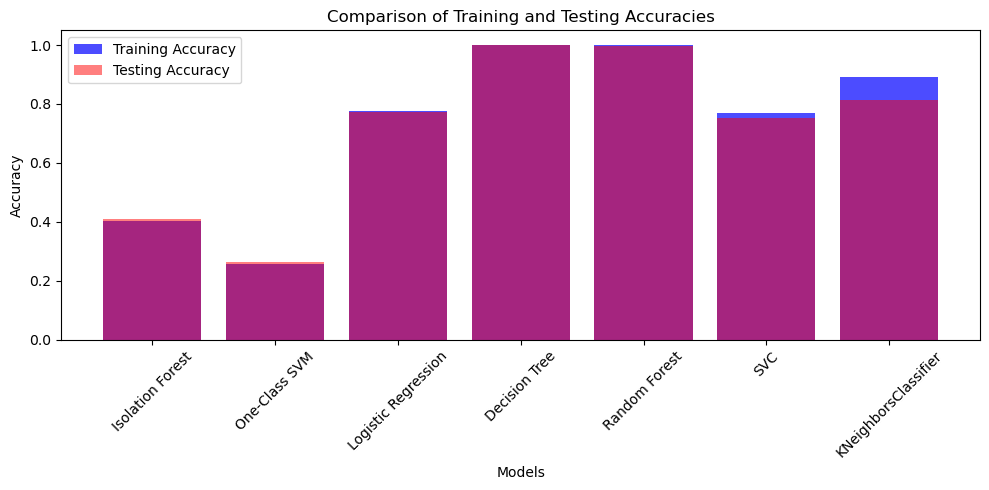

In [22]:
# Results data
results_data = [
    ['Model', 'Training Accuracy', 'Testing Accuracy'],
    ['Isolation Forest', tr_ac_n_if, tst_ac_n_if],
    ['One-Class SVM', tr_ac_n_osvm, tst_ac_n_osvm],
    ['Logistic Regression', tr_ac_n_lr, tst_ac_n_lr],
    ['Decision Tree', tr_ac_n_dt, tst_ac_n_dt],
    ['Random Forest', tr_ac_n_rf, tst_ac_n_rf],
    ['SVC', tr_ac_n_svc, tst_ac_n_svc],
    ['KNeighborsClassifier', tr_ac_n_knn, tst_ac_n_knn]
]

# Print results table
print(tabulate(results_data, headers='firstrow', tablefmt='grid'))

# Plotting the graph
models = ['Isolation Forest', 'One-Class SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNeighborsClassifier']
training_accuracies = [tr_ac_n_if, tr_ac_n_osvm, tr_ac_n_lr, tr_ac_n_dt, tr_ac_n_rf, tr_ac_n_svc, tr_ac_n_knn]
testing_accuracies = [tst_ac_n_if, tst_ac_n_osvm, tst_ac_n_lr, tst_ac_n_dt, tst_ac_n_rf, tst_ac_n_svc, tst_ac_n_knn]

plt.figure(figsize=(10, 5))

plt.bar(models, training_accuracies, alpha=0.7, color='b', label='Training Accuracy')
plt.bar(models, testing_accuracies, alpha=0.5, color='r', label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracies')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Classification report for Isolation Forest
cr_n_if = classification_report(y_test, y_test_pred_if, output_dict=True)
precision_if = cr_n_if['1']['precision']
recall_if = cr_n_if['1']['recall']
f1_score_if = cr_n_if['1']['f1-score']
support_if = cr_n_if['1']['support']

# Classification report for One-Class SVM
cr_n_osvm = classification_report(y_test, y_test_pred_osvm, output_dict=True)
precision_osvm = cr_n_osvm['1']['precision']
recall_osvm = cr_n_osvm['1']['recall']
f1_score_osvm = cr_n_osvm['1']['f1-score']
support_osvm = cr_n_osvm['1']['support']

# Classification report
cr_n_lr = classification_report(y_test, y_test_pred_lr, output_dict=True)
precision_lr = cr_n_lr['1']['precision']
recall_lr = cr_n_lr['1']['recall']
f1_score_lr = cr_n_lr['1']['f1-score']
support_lr = cr_n_lr['1']['support']

# Classification report
cr_n_dt = classification_report(y_test, y_test_pred_dt, output_dict=True)
precision_dt = cr_n_dt['1']['precision']
recall_dt = cr_n_dt['1']['recall']
f1_score_dt = cr_n_dt['1']['f1-score']
support_dt = cr_n_dt['1']['support']

# Classification Report
cr_n_rf = classification_report(y_test, y_test_pred_rf, output_dict=True)
precision_rf = cr_n_rf['1']['precision']
recall_rf = cr_n_rf['1']['recall']
f1_score_rf = cr_n_rf['1']['f1-score']
support_rf = cr_n_rf['1']['support']

# Classification report
cr_n_svc = classification_report(y_test, y_test_pred_svc, output_dict=True)
precision_svc = cr_n_svc['1']['precision']
recall_svc = cr_n_svc['1']['recall']
f1_score_svc = cr_n_svc['1']['f1-score']
support_svc = cr_n_svc['1']['support']

# Classification report
cr_n_knn = classification_report(y_test, y_test_pred_knn, output_dict=True)
precision_knn = cr_n_knn['1']['precision']
recall_knn = cr_n_knn['1']['recall']
f1_score_knn = cr_n_knn['1']['f1-score']
support_knn = cr_n_knn['1']['support']

In [24]:
# Define the classification results for each model
results = []

results.append(("Isolation Forest", precision_if, recall_if, f1_score_if, support_if))
results.append(("One-Class SVM", precision_osvm, recall_osvm, f1_score_osvm, support_osvm))
results.append(("Logistic Regression", precision_lr, recall_lr, f1_score_lr, support_lr))
results.append(("Random Forest", precision_rf, recall_rf, f1_score_rf, support_rf))
results.append(("SVC", precision_svc, recall_svc, f1_score_svc, support_svc))
results.append(("KNN", precision_knn, recall_knn, f1_score_knn, support_knn))

In [25]:
# Print the table
headers = ["Model", "Precision", "Recall", "F1 Score", "Support"]
print(tabulate(results, headers=headers))

Model                  Precision    Recall    F1 Score    Support
-------------------  -----------  --------  ----------  ---------
Isolation Forest        0.458567  0.904972    0.608696        905
One-Class SVM           0.526527  0.581215    0.552521        905
Logistic Regression     0.698573  0.919337    0.793893        905
Random Forest           1         0.99116     0.99556         905
SVC                     0.66853   0.924862    0.776078        905
KNN                     0.792291  0.81768     0.804785        905


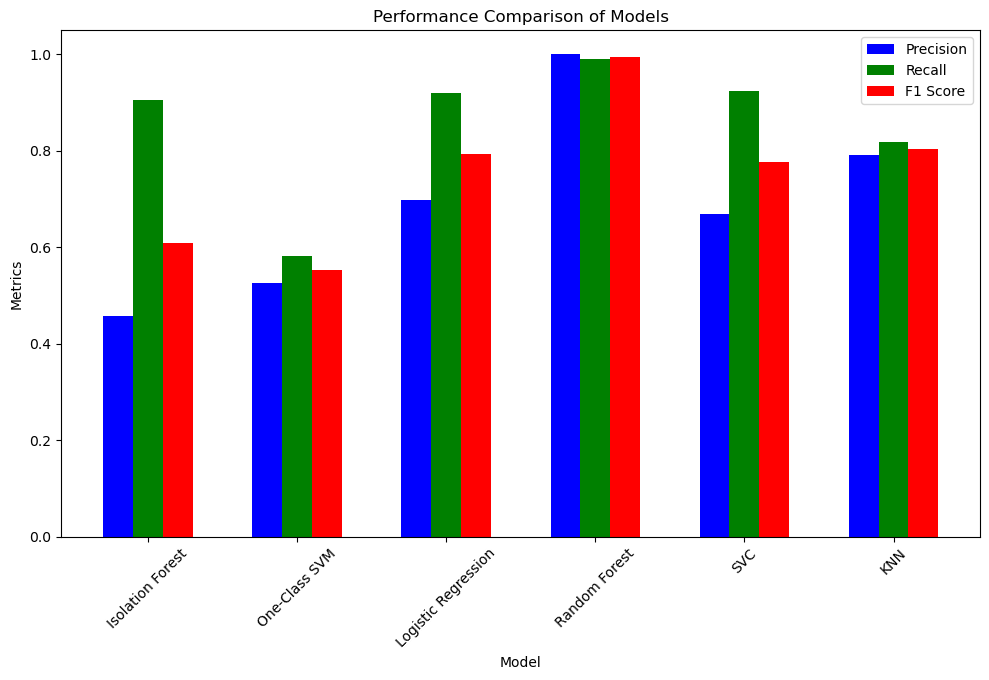

In [26]:
# Define model names and corresponding metrics
models = ["Isolation Forest", "One-Class SVM", "Logistic Regression", "Random Forest", "SVC", "KNN"]
precision = [precision_if, precision_osvm, precision_lr, precision_rf, precision_svc, precision_knn]
recall = [recall_if, recall_osvm, recall_lr, recall_rf, recall_svc, recall_knn]
f1_score = [f1_score_if, f1_score_osvm, f1_score_lr, f1_score_rf, f1_score_svc, f1_score_knn]

# Plot the metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2
index = range(len(models))

# Plot bars for precision
ax.bar(index, precision, width=bar_width, label='Precision', color='b', align='center')

# Plot bars for recall
ax.bar([i + bar_width for i in index], recall, width=bar_width, label='Recall', color='g', align='center')

# Plot bars for F1 score
ax.bar([i + bar_width * 2 for i in index], f1_score, width=bar_width, label='F1 Score', color='r', align='center')

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Metrics')
ax.set_title('Performance Comparison of Models')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [27]:
data

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,1525886327,CCgnLJ10KSUXo4361j,192.168.100.103,43763,230.170.105.210,30508,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
1,1525901265,C5aCpn1Zs4lRfZzM16,192.168.100.103,60006,82.243.151.23,15409,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Benign -,NaN
2,1525891104,CcKFMi3BNQ0UivKZN,192.168.100.103,52872,192.201.250.82,8080,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
3,1525913652,CDUgON2oPPIGZzS0T1,192.168.100.103,43763,223.90.6.224,13944,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
4,1525891138,CQeHEE2YU7WwsvxcO9,192.168.100.103,60776,161.222.111.104,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1525887707,CYWLQz10sljBZIScG1,192.168.100.103,43763,182.103.44.72,65280,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
9996,1537535308,Cwg5LBwQ3BTh6J6Gc,192.168.2.3,59312,52.216.105.243,80,tcp,http,300.094909,292,...,-,-,0,ShADadfFr,8,632,6,1027,- benign -,NaN
9997,1525885300,Ct5WhurLggI85tIKl,192.168.100.103,56375,178.76.152.203,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
9998,1525901002,CumH1g3hCREkurOSr2,192.168.100.103,43763,110.190.185.29,52613,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN


In [28]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': ['auto', 0.5, 0.8],
    'contamination': [0.01, 0.05, 0.1]
}

# Create an instance of the Isolation Forest model
isolation_forest = IsolationForest(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=isolation_forest, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Save the best model as a .pkl file
filename = 'isolation_forest_model.pkl'
joblib.dump(grid_search.best_estimator_, filename)

print(f"Model saved as {filename}")

Best Hyperparameters: {'contamination': 0.01, 'max_samples': 'auto', 'n_estimators': 50}
Model saved as isolation_forest_model.pkl


In [29]:
# Predictions on training data
y_train_pred = grid_search.predict(X_train)

# Predictions on testing data
y_test_pred = grid_search.predict(X_test)

# Print classification report
cr_if = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(cr_if)

# Calculate training accuracy
tr_ac_if = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", tr_ac_if)

# Calculate testing accuracy
tst_ac_if = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", tst_ac_if)

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.45      1.00      0.62       905
           2       0.00      0.00      0.00      1063
           3       0.00      0.00      0.00        32

    accuracy                           0.45      2000
   macro avg       0.11      0.25      0.16      2000
weighted avg       0.21      0.45      0.28      2000

Training Accuracy: 0.443875
Testing Accuracy: 0.451


In [30]:
# Define the One-Class SVM model
one_class_svm = OneClassSVM()

# Define the parameter grid for hyperparameter tuning
param_grid = {'nu': [0.01, 0.05, 0.1, 0.15, 0.2]}  # Adjust values as needed

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=one_class_svm, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Train GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Save the trained model to a .pkl file
filename = 'one_class_svm_model.pkl'
joblib.dump(grid_search.best_estimator_, filename)

print(f"Model saved as {filename}")

Best Hyperparameters: {'nu': 0.01}
Model saved as one_class_svm_model.pkl


In [31]:
# Predictions on the training set
y_train_pred = grid_search.predict(X_train)

# Predictions on the testing set
y_test_pred = grid_search.predict(X_test)

# Classification report
cr_osvm = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(cr_osvm)

# Training accuracy
tr_ac_osvm = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", tr_ac_osvm)

# Testing accuracy
tst_ac_osvm = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", tst_ac_osvm)


Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.45      0.99      0.62       905
           2       0.00      0.00      0.00      1063
           3       0.00      0.00      0.00        32

    accuracy                           0.45      2000
   macro avg       0.11      0.25      0.16      2000
weighted avg       0.21      0.45      0.28      2000

Training Accuracy: 0.442375
Testing Accuracy: 0.449


In [32]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create GridSearchCV object for Logistic Regression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, scoring='accuracy', cv=5, n_jobs=-1)

# Train GridSearchCV on training data
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)

# Save the trained model to a .pkl file
filename_lr = 'logistic_regression_model.pkl'
joblib.dump(grid_search_lr, filename_lr)

print(f"Logistic Regression model saved as {filename_lr}")

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Logistic Regression model saved as logistic_regression_model.pkl


In [33]:
# Classification Report
y_pred_train_lr = grid_search_lr.predict(X_train)
y_pred_test_lr = grid_search_lr.predict(X_test)
cr_lr = classification_report(y_train, y_pred_train_lr)
print("Classification Report for Training Data (Logistic Regression):")
print(cr_lr)

# Training Accuracy
tr_ac_lr = grid_search_lr.best_score_
print("Training Accuracy (Logistic Regression):", tr_ac_lr)

# Testing Accuracy
tst_ac_lr = grid_search_lr.score(X_test, y_test)
print("Testing Accuracy (Logistic Regression):", tst_ac_lr)


Classification Report for Training Data (Logistic Regression):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.69      0.89      0.78      3554
           2       0.86      0.68      0.76      4276
           3       0.47      0.11      0.17       168

    accuracy                           0.76      8000
   macro avg       0.51      0.42      0.43      8000
weighted avg       0.78      0.76      0.75      8000

Training Accuracy (Logistic Regression): 0.7655
Testing Accuracy (Logistic Regression): 0.7595


In [34]:
# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(X_train, y_train)

# Define the filename for saving the model
filename = 'decision_tree_model.pkl'

# Save the trained model to a .pkl file
joblib.dump(grid_search_dt, filename)

print(f"Model saved as {filename}")


Model saved as decision_tree_model.pkl


In [35]:
# Load the saved model
loaded_model = joblib.load(filename)

# Predictions on training and testing data
y_train_pred_dt = loaded_model.predict(X_train)
y_test_pred_dt = loaded_model.predict(X_test)

# Classification report
cr_dt = classification_report(y_test, y_test_pred_dt)
print("Classification Report for Decision Tree Classifier:\n", cr_dt)

# Training accuracy
tr_ac_dt = accuracy_score(y_train, y_train_pred_dt)
print("Training Accuracy for Decision Tree Classifier:", tr_ac_dt)

# Testing accuracy
tst_ac_dt = accuracy_score(y_test, y_test_pred_dt)
print("Testing Accuracy for Decision Tree Classifier:", tst_ac_dt)


Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       905
           2       1.00      1.00      1.00      1063
           3       1.00      1.00      1.00        32

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Training Accuracy for Decision Tree Classifier: 1.0
Testing Accuracy for Decision Tree Classifier: 0.9985


In [36]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_gb, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Train GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Define the filename for saving the model
filename = 'grid_search_gb_model.pkl'

# Save the trained model to a .pkl file
joblib.dump(grid_search_gb, filename)

print(f"Gradient Boosting model saved as {filename}")

Gradient Boosting model saved as grid_search_gb_model.pkl


In [37]:
# Initialize the GradientBoostingClassifier with best parameters from GridSearchCV
gb_classifier = GradientBoostingClassifier(n_estimators=grid_search_gb.best_params_['n_estimators'],
                                           learning_rate=grid_search_gb.best_params_['learning_rate'],
                                           max_depth=grid_search_gb.best_params_['max_depth'])

# Train the GradientBoostingClassifier on the training data
gb_classifier.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred_gb = gb_classifier.predict(X_train)
y_test_pred_gb = gb_classifier.predict(X_test)

# Classification report
cr_gb = classification_report(y_test, y_test_pred_gb)
print("Classification Report for Gradient Boosting Classifier:\n", cr_gb)

# Training accuracy
tr_ac_gb = accuracy_score(y_train, y_train_pred_gb)
print("Training Accuracy for Gradient Boosting Classifier:", tr_ac_gb)

# Testing accuracy
tst_ac_gb = accuracy_score(y_test, y_test_pred_gb)
print("Testing Accuracy for Gradient Boosting Classifier:", tst_ac_gb)


Classification Report for Gradient Boosting Classifier:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       905
           2       1.00      1.00      1.00      1063
           3       1.00      1.00      1.00        32

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Training Accuracy for Gradient Boosting Classifier: 1.0
Testing Accuracy for Gradient Boosting Classifier: 0.999


In [38]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a GridSearchCV object for KNN
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)

# Train GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Define the filename for saving the model
filename = 'grid_search_knn_model.pkl'

# Save the trained model to a .pkl file
joblib.dump(grid_search_knn, filename)

print(f"Model saved as {filename}")


Model saved as grid_search_knn_model.pkl


In [39]:
# Classification Report
cr_knn = classification_report(y_test, grid_search_knn.predict(X_test))
print("Classification Report for KNN Model:\n", cr_knn)

# Training Accuracy
tr_ac_knn = grid_search_knn.best_score_
print("Training Accuracy for KNN Model:", tr_ac_knn)

# Testing Accuracy
tst_ac_knn = grid_search_knn.score(X_test, y_test)
print("Testing Accuracy for KNN Model:", tst_ac_knn)

Classification Report for KNN Model:
               precision    recall  f1-score   support

           1       0.88      0.91      0.89       905
           2       0.91      0.89      0.90      1063
           3       0.96      0.75      0.84        32

    accuracy                           0.90      2000
   macro avg       0.92      0.85      0.88      2000
weighted avg       0.90      0.90      0.90      2000

Training Accuracy for KNN Model: 0.9002500000000001
Testing Accuracy for KNN Model: 0.8975


+---------------------+---------------------+--------------------+
| Model               |   Training Accuracy |   Testing Accuracy |
+=====================+=====================+====================+
| Isolation Forest    |            0.443875 |             0.451  |
+---------------------+---------------------+--------------------+
| One-Class SVM       |            0.442375 |             0.449  |
+---------------------+---------------------+--------------------+
| Logistic Regression |            0.7655   |             0.7595 |
+---------------------+---------------------+--------------------+
| Decision Tree       |            1        |             0.9985 |
+---------------------+---------------------+--------------------+
| Gradient Boosting   |            1        |             0.999  |
+---------------------+---------------------+--------------------+
| KNN                 |            0.90025  |             0.8975 |
+---------------------+---------------------+-----------------

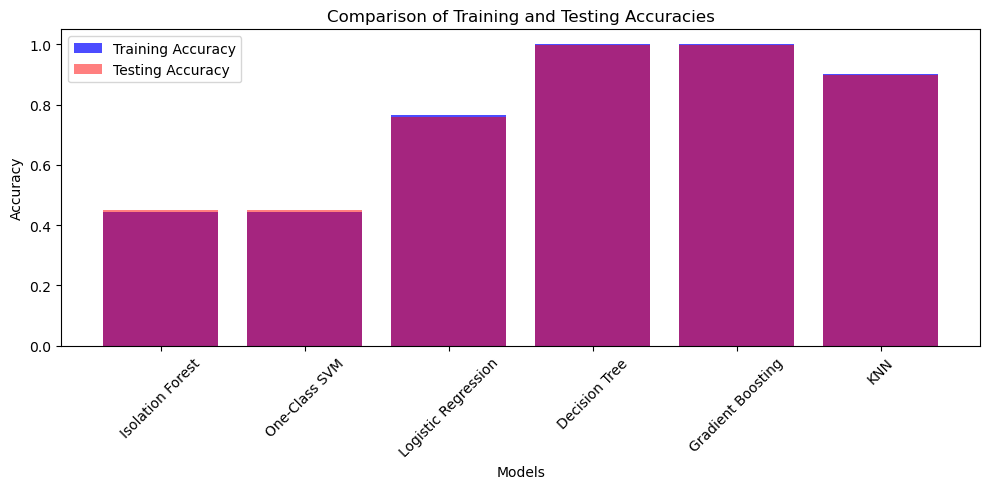

In [40]:
# Results data
results_data = [
    ['Model', 'Training Accuracy', 'Testing Accuracy'],
    ['Isolation Forest', tr_ac_if, tst_ac_if],
    ['One-Class SVM', tr_ac_osvm, tst_ac_osvm],
    ['Logistic Regression', tr_ac_lr, tst_ac_lr],
    ['Decision Tree', tr_ac_dt, tst_ac_dt],
    ['Gradient Boosting', tr_ac_gb, tst_ac_gb],
    ['KNN', tr_ac_knn, tst_ac_knn]
]

# Print results table
print(tabulate(results_data, headers='firstrow', tablefmt='grid'))

# Plotting the graph
models = ['Isolation Forest', 'One-Class SVM', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'KNN']
training_accuracies = [tr_ac_if, tr_ac_osvm, tr_ac_lr, tr_ac_dt, tr_ac_gb, tr_ac_knn]
testing_accuracies = [tst_ac_if, tst_ac_osvm, tst_ac_lr, tst_ac_dt, tst_ac_gb, tst_ac_knn]

plt.figure(figsize=(10, 5))

plt.bar(models, training_accuracies, alpha=0.7, color='b', label='Training Accuracy')
plt.bar(models, testing_accuracies, alpha=0.5, color='r', label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracies')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Results for the first method:
+---------------------+---------------------+--------------------+
| Model               |   Training Accuracy |   Testing Accuracy |
+=====================+=====================+====================+
| Isolation Forest    |            0.443875 |             0.451  |
+---------------------+---------------------+--------------------+
| One-Class SVM       |            0.442375 |             0.449  |
+---------------------+---------------------+--------------------+
| Logistic Regression |            0.7655   |             0.7595 |
+---------------------+---------------------+--------------------+
| Decision Tree       |            1        |             0.9985 |
+---------------------+---------------------+--------------------+
| Gradient Boosting   |            1        |             0.999  |
+---------------------+---------------------+--------------------+
| KNN                 |            0.90025  |             0.8975 |
+---------------------+---------

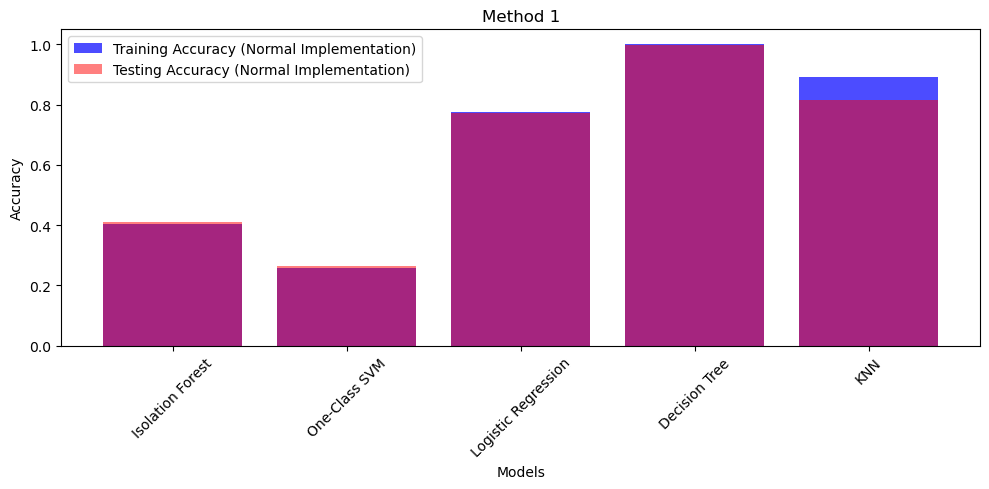

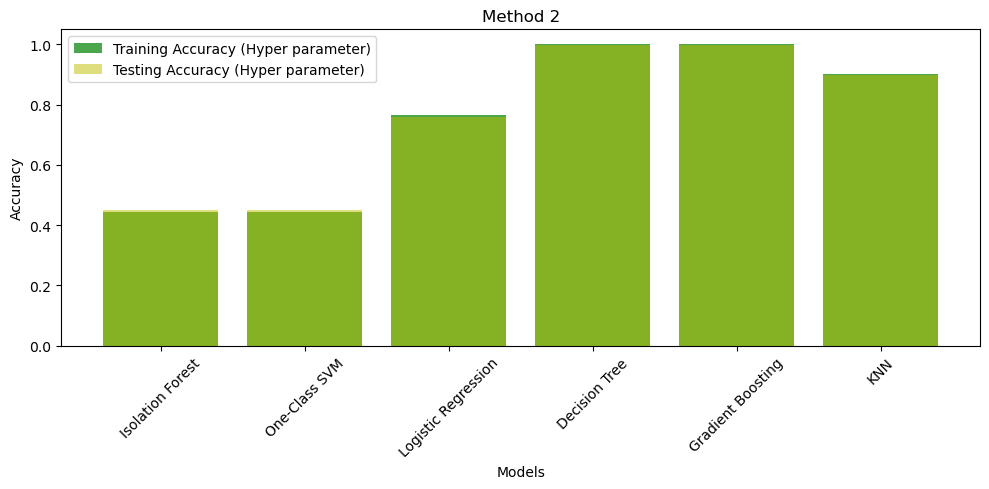

In [41]:
# Results data for the first method
results_data_1 = [
    ['Model', 'Training Accuracy', 'Testing Accuracy'],
    ['Isolation Forest', tr_ac_if, tst_ac_if],
    ['One-Class SVM', tr_ac_osvm, tst_ac_osvm],
    ['Logistic Regression', tr_ac_lr, tst_ac_lr],
    ['Decision Tree', tr_ac_dt, tst_ac_dt],
    ['Gradient Boosting', tr_ac_gb, tst_ac_gb],
    ['KNN', tr_ac_knn, tst_ac_knn]
]

# Results data for the second method
results_data_2 = [
    ['Model', 'Training Accuracy', 'Testing Accuracy'],
    ['Isolation Forest', tr_ac_n_if, tst_ac_n_if],
    ['One-Class SVM', tr_ac_n_osvm, tst_ac_n_osvm],
    ['Logistic Regression', tr_ac_n_lr, tst_ac_n_lr],
    ['Decision Tree', tr_ac_n_dt, tst_ac_n_dt],
    ['Random Forest', tr_ac_n_rf, tst_ac_n_rf],
    ['SVC', tr_ac_n_svc, tst_ac_n_svc],
    ['KNeighborsClassifier', tr_ac_n_knn, tst_ac_n_knn]
]

# Print results table for the first method
print("Results for the first method:")
print(tabulate(results_data_1, headers='firstrow', tablefmt='grid'))

# Print results table for the first method
print("Results for the Second method:")
print(tabulate(results_data_2, headers='firstrow', tablefmt='grid'))

# Plotting the graph for the first method
models_1 = ['Isolation Forest', 'One-Class SVM', 'Logistic Regression', 'Decision Tree', 'KNN']
training_accuracies_1 = [tr_ac_n_if, tr_ac_n_osvm, tr_ac_n_lr, tr_ac_n_dt, tr_ac_n_knn]
testing_accuracies_1 = [tst_ac_n_if, tst_ac_n_osvm, tst_ac_n_lr, tst_ac_n_dt, tst_ac_n_knn]

plt.figure(figsize=(10, 5))
plt.bar(models_1, training_accuracies_1, alpha=0.7, color='b', label='Training Accuracy (Normal Implementation)')
plt.bar(models_1, testing_accuracies_1, alpha=0.5, color='r', label='Testing Accuracy (Normal Implementation)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Method 1')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the graph for the second method
models_2 = ['Isolation Forest', 'One-Class SVM', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'KNN']
training_accuracies_2 = [tr_ac_if, tr_ac_osvm, tr_ac_lr, tr_ac_dt, tr_ac_gb, tr_ac_knn]
testing_accuracies_2 = [tst_ac_if, tst_ac_osvm, tst_ac_lr, tst_ac_dt, tst_ac_gb, tst_ac_knn]

plt.figure(figsize=(10, 5))
plt.bar(models_2, training_accuracies_2, alpha=0.7, color='g', label='Training Accuracy (Hyper parameter)')
plt.bar(models_2, testing_accuracies_2, alpha=0.5, color='y', label='Testing Accuracy (Hyper parameter)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Method 2')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
# Define the classification reports
cr_lr = classification_report(y_test, y_test_pred_lr, output_dict=True)
cr_dt = classification_report(y_test, y_test_pred_dt, output_dict=True)
cr_gb = classification_report(y_test, y_test_pred_gb, output_dict=True)
cr_knn = classification_report(y_test, y_test_pred_knn, output_dict=True)
cr_if = classification_report(y_test, y_test_pred_if, output_dict=True)
cr_osvm = classification_report(y_test, y_test_pred_osvm, output_dict=True)

# Extract precision, recall, f1-score, and support for each model
precision_lr = cr_lr['weighted avg']['precision']
recall_lr = cr_lr['weighted avg']['recall']
f1_lr = cr_lr['weighted avg']['f1-score']
support_lr = cr_lr['weighted avg']['support']

precision_dt = cr_dt['weighted avg']['precision']
recall_dt = cr_dt['weighted avg']['recall']
f1_dt = cr_dt['weighted avg']['f1-score']
support_dt = cr_dt['weighted avg']['support']

precision_gb = cr_gb['weighted avg']['precision']
recall_gb = cr_gb['weighted avg']['recall']
f1_gb = cr_gb['weighted avg']['f1-score']
support_gb = cr_gb['weighted avg']['support']

precision_knn = cr_knn['weighted avg']['precision']
recall_knn = cr_knn['weighted avg']['recall']
f1_knn = cr_knn['weighted avg']['f1-score']
support_knn = cr_knn['weighted avg']['support']

precision_if = cr_if['weighted avg']['precision']
recall_if = cr_if['weighted avg']['recall']
f1_if = cr_if['weighted avg']['f1-score']
support_if = cr_if['weighted avg']['support']

precision_osvm = cr_osvm['weighted avg']['precision']
recall_osvm = cr_osvm['weighted avg']['recall']
f1_osvm = cr_osvm['weighted avg']['f1-score']
support_osvm = cr_osvm['weighted avg']['support']

# Data for the table
results_new = [
    ["Logistic Regression", precision_lr, recall_lr, f1_lr, support_lr],
    ["Decision Tree", precision_dt, recall_dt, f1_dt, support_dt],
    ["Gradient Boosting", precision_gb, recall_gb, f1_gb, support_gb],
    ["Isolation Forest", precision_if, recall_if, f1_if, support_if],
    ["One Class SVM", precision_osvm, recall_osvm, f1_osvm, support_osvm],
    ["KNN", precision_knn, recall_knn, f1_knn, support_knn],
]

# Headers for the table
headers = ["Model", "Precision", "Recall", "F1 Score", "Support"]

# Print the table
print(tabulate(results_new, headers=headers))

Model                  Precision    Recall    F1 Score    Support
-------------------  -----------  --------  ----------  ---------
Logistic Regression     0.793541    0.7725    0.765615       2000
Decision Tree           0.9985      0.9985    0.9985         2000
Gradient Boosting       0.999       0.999     0.999          2000
Isolation Forest        0.207501    0.4095    0.275435       2000
One Class SVM           0.238253    0.263     0.250016       2000
KNN                     0.815247    0.8145    0.814347       2000


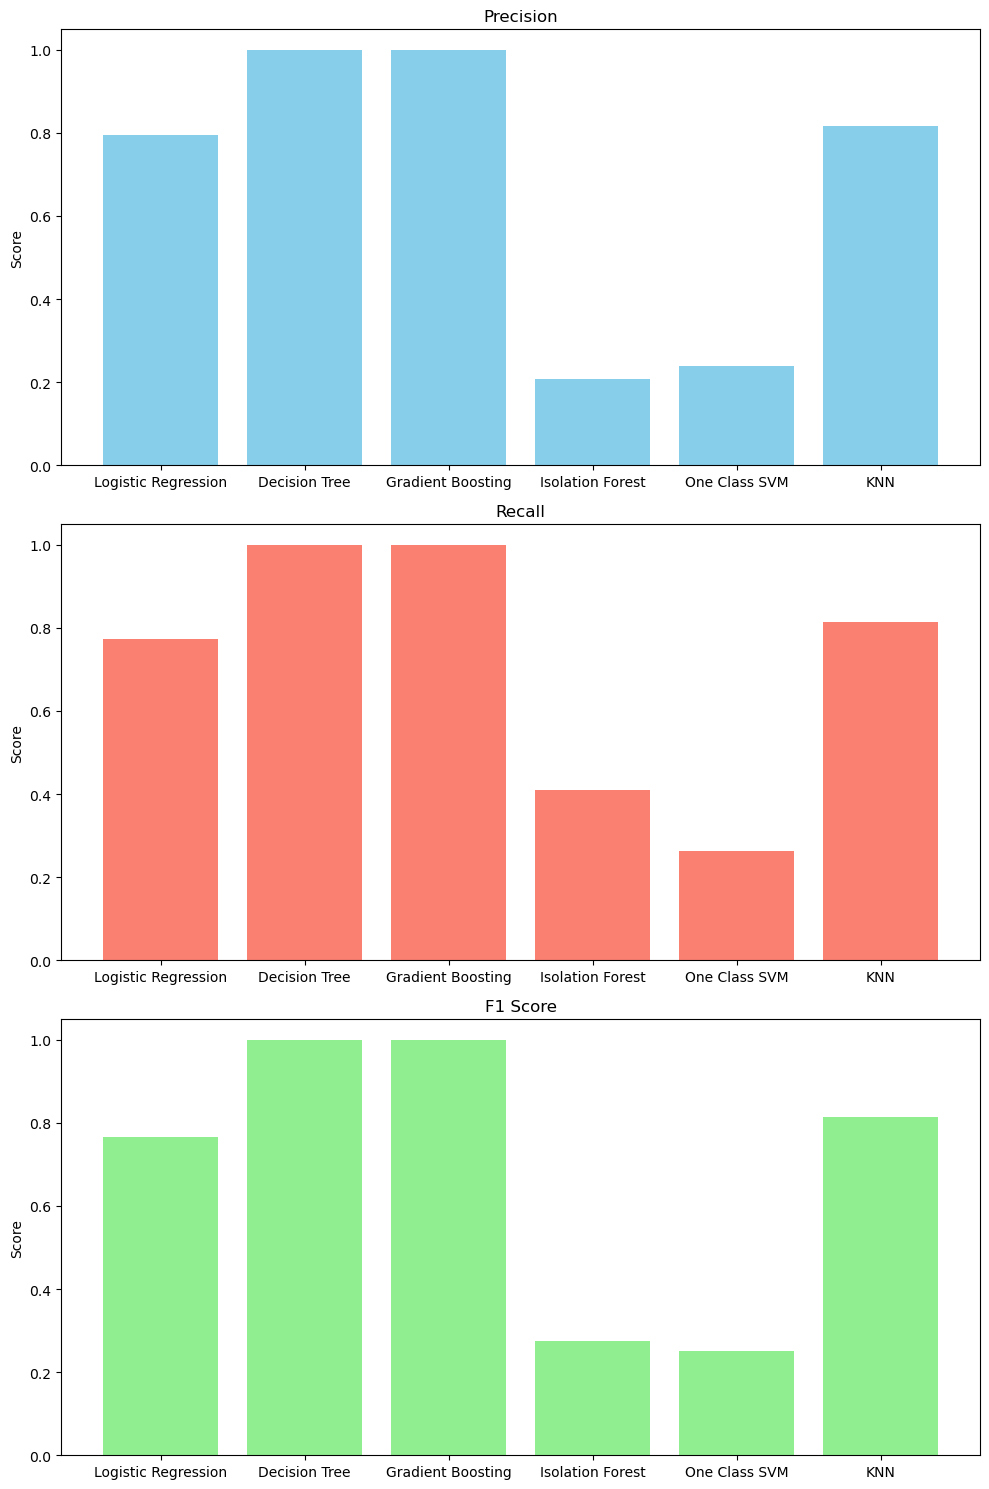

In [43]:
import matplotlib.pyplot as plt

# Models and their corresponding metrics
models = ["Logistic Regression", "Decision Tree", "Gradient Boosting", "Isolation Forest", "One Class SVM", "KNN"]
precisions = [precision_lr, precision_dt, precision_gb, precision_if, precision_osvm, precision_knn]
recalls = [recall_lr, recall_dt, recall_gb, recall_if, recall_osvm, recall_knn]
f1_scores = [f1_lr, f1_dt, f1_gb, f1_if, f1_osvm, f1_knn]
supports = [support_lr, support_dt, support_gb, support_if, support_osvm, support_knn]

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Precision
axes[0].bar(models, precisions, color='skyblue')
axes[0].set_title('Precision')
axes[0].set_ylabel('Score')

# Recall
axes[1].bar(models, recalls, color='salmon')
axes[1].set_title('Recall')
axes[1].set_ylabel('Score')

# F1 Score
axes[2].bar(models, f1_scores, color='lightgreen')
axes[2].set_title('F1 Score')
axes[2].set_ylabel('Score')

# Adjust layout
plt.tight_layout()
plt.show()


In [44]:
import joblib
from sklearn.metrics import classification_report, accuracy_score

# Load the saved model
loaded_model = joblib.load(filename)

# Predictions on training and testing data
y_train_pred_dt = loaded_model.predict(X_train)
y_test_pred_dt = loaded_model.predict(X_test)

# Classification report
cr_dt = classification_report(y_test, y_test_pred_dt)
print("Classification Report for Decision Tree Classifier:\n", cr_dt)

# Training accuracy
tr_ac_dt = accuracy_score(y_train, y_train_pred_dt)
print("Training Accuracy for Decision Tree Classifier:", tr_ac_dt)

# Testing accuracy
tst_ac_dt = accuracy_score(y_test, y_test_pred_dt)
print("Testing Accuracy for Decision Tree Classifier:", tst_ac_dt)

# Detecting anomalies and taking action
threshold = 0.9  # Set your threshold for anomaly detection
anomalies = y_test_pred_dt[y_test_pred_dt < threshold]  # Assuming anomalies are predicted when the prediction score is below the threshold

if len(anomalies) > 0:
    # Generate alerts or trigger corrective measures
    print("Anomalies detected! Taking action...")
    # Add your code here to handle the anomalies, such as sending alerts or triggering corrective measures
else:
    print("No anomalies detected.")

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           1       0.88      0.91      0.89       905
           2       0.91      0.89      0.90      1063
           3       0.96      0.75      0.84        32

    accuracy                           0.90      2000
   macro avg       0.92      0.85      0.88      2000
weighted avg       0.90      0.90      0.90      2000

Training Accuracy for Decision Tree Classifier: 1.0
Testing Accuracy for Decision Tree Classifier: 0.8975
No anomalies detected.


In [45]:
y_test

6252    1
4684    2
1731    1
4742    1
4521    1
       ..
6412    2
8285    1
7853    2
1095    2
6929    1
Name: resp_ip_bytes, Length: 2000, dtype: int32

In [46]:
import joblib
from sklearn.metrics import classification_report, accuracy_score

# Load the saved model
loaded_model = joblib.load(filename)

try:
    # Input from the user (assuming user provides resp_ip_bytes)
    resp_ip_bytes = input("Enter the value of resp_ip_bytes: ")
    resp_ip_bytes = float(resp_ip_bytes)  # Convert input to float

    # Predictions on the user input
    user_prediction = loaded_model.predict([[resp_ip_bytes]])

    # Output the prediction result
    print("Prediction for resp_ip_bytes:", user_prediction)

    # If the user prediction indicates an anomaly, take action
    threshold = 0.9  # Set your threshold for anomaly detection
    if user_prediction < threshold:
        # Generate alerts or trigger corrective measures
        print("Anomaly detected! Taking action...")
        # Add your code here to handle the anomaly, such as sending alerts or triggering corrective measures
    else:
        print("No anomaly detected.")

except ValueError:
    print("Error: Input must be a numeric value.")


Enter the value of resp_ip_bytes: 120
Error: Input must be a numeric value.


In [47]:
data

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,1525886327,CCgnLJ10KSUXo4361j,192.168.100.103,43763,230.170.105.210,30508,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
1,1525901265,C5aCpn1Zs4lRfZzM16,192.168.100.103,60006,82.243.151.23,15409,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Benign -,NaN
2,1525891104,CcKFMi3BNQ0UivKZN,192.168.100.103,52872,192.201.250.82,8080,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
3,1525913652,CDUgON2oPPIGZzS0T1,192.168.100.103,43763,223.90.6.224,13944,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
4,1525891138,CQeHEE2YU7WwsvxcO9,192.168.100.103,60776,161.222.111.104,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1525887707,CYWLQz10sljBZIScG1,192.168.100.103,43763,182.103.44.72,65280,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN
9996,1537535308,Cwg5LBwQ3BTh6J6Gc,192.168.2.3,59312,52.216.105.243,80,tcp,http,300.094909,292,...,-,-,0,ShADadfFr,8,632,6,1027,- benign -,NaN
9997,1525885300,Ct5WhurLggI85tIKl,192.168.100.103,56375,178.76.152.203,23,tcp,-,-,-,...,-,-,0,S,1,60,0,0,(empty) Malicious PartOfAHorizontalPortScan,NaN
9998,1525901002,CumH1g3hCREkurOSr2,192.168.100.103,43763,110.190.185.29,52613,udp,-,-,-,...,-,-,0,D,1,40,0,0,(empty) Benign -,NaN


In [48]:
# Convert 'resp_ip_bytes' column to numeric
data['resp_ip_bytes'] = pd.to_numeric(data['resp_ip_bytes'], errors='coerce')

# Define threshold values for identifying vulnerability types
low_threshold = 1000  # Define your low threshold value
medium_threshold = 5000  # Define your medium threshold value
high_threshold = 10000  # Define your high threshold value

# Define conditions and corresponding values for vulnerability types
conditions = [
    (data['resp_ip_bytes'] > high_threshold),
    (data['resp_ip_bytes'] > medium_threshold),
    (data['resp_ip_bytes'] > low_threshold)
]

values = ['Critical', 'High', 'Medium']

# Create a new column 'vulnerability_type' based on conditions
data['vulnerability_type'] = np.select(conditions, values, default='Low')

# Print the updated DataFrame
data

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label,vulnerability_type
0,1525886327,CCgnLJ10KSUXo4361j,192.168.100.103,43763,230.170.105.210,30508,udp,-,-,-,...,-,0,D,1,40,0,0,NaN,NaN,Low
1,1525901265,C5aCpn1Zs4lRfZzM16,192.168.100.103,60006,82.243.151.23,15409,tcp,-,-,-,...,-,0,S,1,60,0,0,NaN,NaN,Low
2,1525891104,CcKFMi3BNQ0UivKZN,192.168.100.103,52872,192.201.250.82,8080,tcp,-,-,-,...,-,0,S,1,60,0,0,NaN,NaN,Low
3,1525913652,CDUgON2oPPIGZzS0T1,192.168.100.103,43763,223.90.6.224,13944,udp,-,-,-,...,-,0,D,1,40,0,0,NaN,NaN,Low
4,1525891138,CQeHEE2YU7WwsvxcO9,192.168.100.103,60776,161.222.111.104,23,tcp,-,-,-,...,-,0,S,1,60,0,0,NaN,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1525887707,CYWLQz10sljBZIScG1,192.168.100.103,43763,182.103.44.72,65280,udp,-,-,-,...,-,0,D,1,40,0,0,NaN,NaN,Low
9996,1537535308,Cwg5LBwQ3BTh6J6Gc,192.168.2.3,59312,52.216.105.243,80,tcp,http,300.094909,292,...,-,0,ShADadfFr,8,632,6,1027,NaN,NaN,Low
9997,1525885300,Ct5WhurLggI85tIKl,192.168.100.103,56375,178.76.152.203,23,tcp,-,-,-,...,-,0,S,1,60,0,0,NaN,NaN,Low
9998,1525901002,CumH1g3hCREkurOSr2,192.168.100.103,43763,110.190.185.29,52613,udp,-,-,-,...,-,0,D,1,40,0,0,NaN,NaN,Low


In [49]:
# Assuming 'df' contains the entire dataset
predictions = pd.DataFrame(columns=['Link', 'Predicted_Label'])

# Generate predictions using list comprehension
predictions['Predicted_Label'] = [loaded_model.predict(row.drop('orig_pkts').values.reshape(1, -1))[0] for _, row in df.iterrows()]
predictions['Link'] = df['orig_pkts'].values

# Display the predictions DataFram
predictions

,Link,Predicted_Label
0,88,1
1,97,1
2,97,2
3,88,1
4,97,2
...,...,...
9995,88,1
9996,101,3
9997,97,2
9998,88,1


In [50]:
# Find unique values in the 'Predicted_Label' column
unique_predicted_labels = predictions['Predicted_Label'].unique()

# Print unique predicted labels
print("Unique Predicted Labels:", unique_predicted_labels)

Unique Predicted Labels: [1 2 3 0]


In [51]:
# Replace 'Predicted_Label' values with 0 for 'Benign' and 1 for 'Malicious'
predictions['Predicted_Label'] = predictions['Predicted_Label'].replace({0:'None',1:'Benign', 2: 'Malicious', 3:'More affected'})

# Display the updated predictions DataFrame
predictions

,Link,Predicted_Label
0,88,Benign
1,97,Benign
2,97,Malicious
3,88,Benign
4,97,Malicious
...,...,...
9995,88,Benign
9996,101,More affected
9997,97,Malicious
9998,88,Benign


In [54]:
import time
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox  # Added for displaying message box

# Function to predict based on input
def predict():
    global index_entry, link_entry, prediction_label
    
    # Get user input
    index = int(index_entry.get())
    link = link_entry.get()
    
    # Placeholder prediction logic, replace this with actual prediction logic using your trained model
    # For demonstration purposes, I'm just using a placeholder prediction
    if index < 1000:
        prediction = 'None'
    elif index < 5000:
        prediction = 'Benign'
    elif index < 10000:
        prediction = 'Malicious'
    else:
        prediction = 'More affected'
    
    # Display prediction
    prediction_label.config(text="Prediction: " + prediction)

# Function to display the interface
def display_predictions():
    global index_entry, link_entry, prediction_label
    
    root = tk.Tk()
    root.title("Predictions")

    # Set background color to red and black combination
    root.configure(background='#800000')  # Dark red color

    # Create input fields for index and link
    index_label = ttk.Label(root, text="Index:", background='#800000', foreground='white')
    index_label.grid(row=0, column=0, padx=5, pady=5)
    index_entry = ttk.Entry(root)
    index_entry.grid(row=0, column=1, padx=5, pady=5)

    link_label = ttk.Label(root, text="Link:", background='#800000', foreground='white')
    link_label.grid(row=1, column=0, padx=5, pady=5)
    link_entry = ttk.Entry(root)
    link_entry.grid(row=1, column=1, padx=5, pady=5)

    # Create prediction button
    predict_button = ttk.Button(root, text="Predict", command=predict)
    predict_button.grid(row=2, column=0, columnspan=2, padx=5, pady=5)

    # Create label to display prediction result
    prediction_label = ttk.Label(root, text="", background='#800000', foreground='white')
    prediction_label.grid(row=3, column=0, columnspan=2, padx=5, pady=5)

    # Create exit button
    exit_button = ttk.Button(root, text="Exit", command=root.destroy)
    exit_button.grid(row=4, column=0, columnspan=2, padx=5, pady=5)

    root.mainloop()

# Record start time
start_time = time.time()

# Call the function to display predictions
display_predictions()

# Record end time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")


Execution Time: 8.111775159835815 seconds
